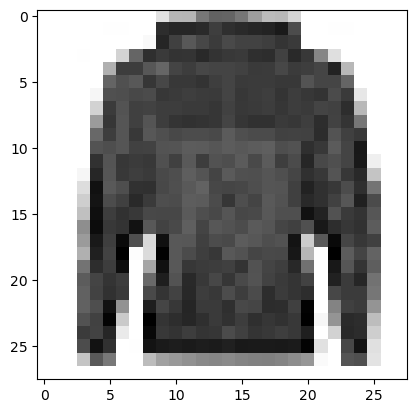

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = np.load("fashion_mnist_images.npy")
y = np.load("fashion_mnist_labels.npy")
d, n= x.shape
i = 0 #Index of the image to be visualized
plt.imshow(np.reshape(x[:,i], (int(np.sqrt(d)),int(np.sqrt(d)))), cmap="Greys")
plt.show()

In [2]:
x = np.insert(x, 0, 1, axis = 0)
train_x = x[:, :5000]
test_x = x[:, 5000:]
train_y = y[:, :5000]
test_y = y[:, 5000:]
#print(x.shape[0])


In [3]:
# Calculate negative log-likelihood
def J(theta, X, y, lambda_val):
    m = len(y.T)
    l = 0
    for i in range(0, m):
        x_i = np.array(X[:, i]).reshape((len(X[:, i]), 1)) # d
        l += np.log(1 + np.exp(-y[0][i] * np.dot(np.transpose(theta), x_i)))
    J = l + lambda_val * np.sum(theta**2)
    return J

# Calculate the gradient and Hessian of the function
def gradient_and_hessian(theta, X, y, lambda_val):
    I = np.diag(np.ones(X.shape[0]), 0)
    m = len(y.T)
    gradient = np.zeros((X.shape[0], 1)) + 2 * lambda_val * theta
    hessian = np.zeros((X.shape[0], X.shape[0])) + 2 * lambda_val * I #don't forget I
    # calculate gradient
    # calculate hessian
    for i in range(0, m):
        x_i = np.array(X[:, i]).reshape((len(X[:, i]), 1)) # d
        gradient += -y[0][i] / (1 + np.exp(y[0][i] * np.dot(np.transpose(theta), x_i))) * x_i # (d+1)*1
        sigmoid = (1 + np.exp(y[0][i] * np.dot(np.transpose(theta), x_i))) ** (-2)
        hessian += sigmoid * np.exp(y[0][i] * np.dot(np.transpose(theta), x_i)) * np.dot(x_i, np.transpose(x_i)) # d+1*d+1
        #print(gradient)
        
    return gradient, hessian

In [4]:
theta = np.zeros((x.shape[0], 1))
lambda_val = 1
epsilon = 1e-6
#print(theta.shape)

In [5]:
iterations = 0
pre_J = J(theta, train_x, train_y, lambda_val)
while True:
    #print("start")
    gradient, hessian = gradient_and_hessian(theta, train_x, train_y, lambda_val)
    #print(theta)
    theta -= np.linalg.inv(hessian).dot(gradient)
    #print(theta)
    current_J = J(theta, train_x, train_y, lambda_val)
    iterations += 1
    print(iterations)
    print((current_J - pre_J) / pre_J)
    if np.abs(current_J - pre_J) / pre_J <= epsilon:
        break
    pre_J = current_J

1
[[-0.67356582]]
2
[[-0.37893995]]
3
[[-0.2312517]]
4
[[-0.11356009]]
5
[[-0.03905217]]
6
[[-0.00715491]]
7
[[-0.0003817]]
8
[[-1.58437748e-06]]
9
[[-3.41397388e-11]]


In [84]:
def predict(theta, X):
    exp = np.exp(-X.T.dot(theta))
    raw_predictions = 1 / (1 + exp)
    predictions = np.zeros((raw_predictions.shape[0], 1))
    #print(predictions)
    for i in range(0, raw_predictions.shape[0]):
        if raw_predictions[i] >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = -1
    predictions = np.array(predictions.reshape(1, 1000))
    #print(predictions)
    return predictions, raw_predictions

test_predictions, raw_predictions = predict(theta, test_x)
#print(test_predictions != test_y)
test_error = np.mean(test_predictions != test_y)

In [85]:
print(f"Test_error: {test_error}\nIterations: {iterations}\nObjective Function: {current_J}")

Test_error: 0.034
Iterations: 9
Objective Function: [[456.63896506]]


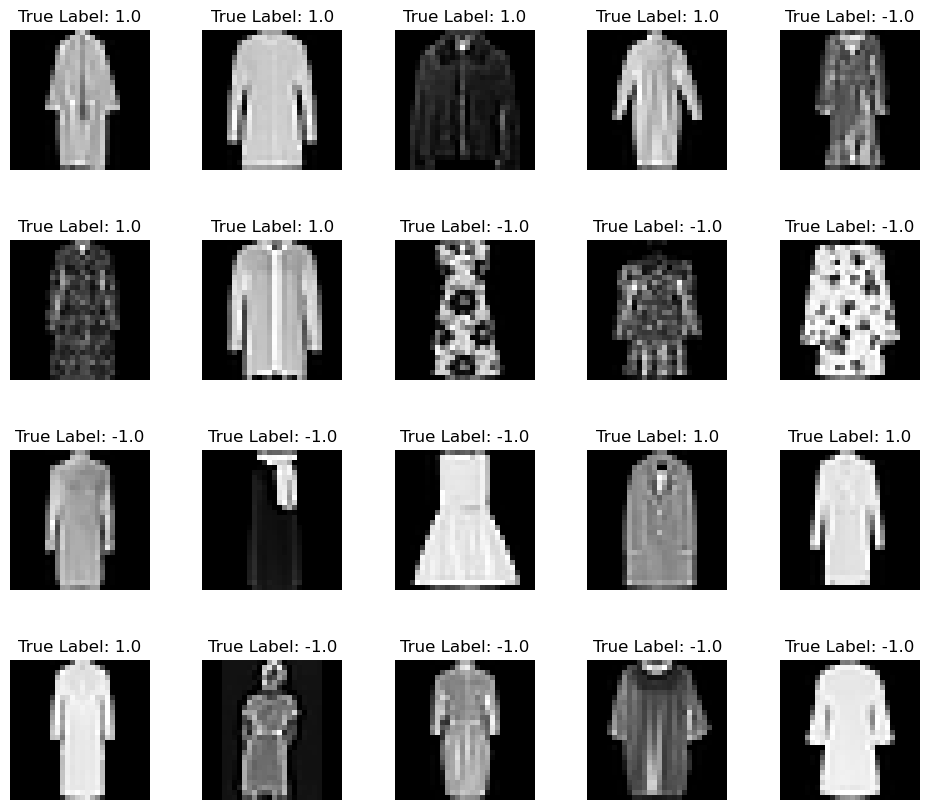

In [94]:
predictions = raw_predictions
true_labels = test_y

# Calculate the confidence scores
confidence_scores = np.abs(predictions - 0.5)  # I define the less confidence one if it is near 0.5, which the
                                               # model cannot actually tell which label it shuold be        
confidence_scores = np.array(confidence_scores.reshape(1, -1))
A = np.argsort(confidence_scores)
# Select the top 20 misclassified samples with the lowest confidence scores
least20_confident_indices = A[0][:20]
#print(least20_confident_indices)
# Create a 4x5 grid for plotting
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Plot the selected misclassified images
for i, ax in enumerate(axes.ravel()):
    index = least20_confident_indices[i]
    image = test_x[:, index] # Replace with your actual test data shape
    true_label = true_labels[0][index]
    image = np.delete(image, 0)
    d = test_x[:, index].shape
    ax.imshow(np.reshape(image, (int(np.sqrt(d)),int(np.sqrt(d)))), cmap='gray')
    ax.set_title(f"True Label: {true_label}")
    ax.axis('off')

plt.show()